In [41]:
import pandas as pd 
df = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [107]:
empty_lines =  [ 15, 20, 21, 25, 28, 31, 34, 38, 39, 48, 52, 65, 68,76
,84,96,98,99,105,107,108,109,114,129,157,158,171,172
,197,210,216,230,240,248,258,268,280,290,292,299,300,304
,308,309,312,313,317,330,346,348,349,353,354,356,362,364
,368,385,400,403,414,419,421,423,425,426,427,429,434,436
,453,457,460,464,465,466,468,470,487,488,502,509,510,514
,526,527,530,531,532,543,554,555,567,569,570,575,580,581
,584,587,591,596,597,601,606,615,620,624,628,629,630,631
,633,634,640,651,653,658,663,665,667,671,675,678,682,685
,688,697,704,717,725,734,744,747,751,753,756,760,764,766
,768,773,774,775,777,778,779,792,795,797,799,801,807,808
,816,818,829,839,847,859,861,862,863,867,870,874,882,888
,892,908,916,918,919,928,933,937,939,946,948,949,959,963
,966,969,973,977,980,983,984,1000,1005,1010,1020,1027,1040,1041
,1043,1050,1051,1052,1054,1062,1068,1070,1079,1080,1087,1094,1097,1103
,1108,1109,1119,1124,1132,1133,1142,1148,1151,1153,1156,1161,1164,1166
,1173,1178,1181,1187,1195,1198,1203,1206,1210,1212,1223,1224,1245,1247
,1253,1274,1277,1280,1288,1289,1291,1298,1316,1317,1324,1339,1343,1345
,1349,1351,1356,1357,1368,1373,1389,1393,1407,1409,1417,1427,1431,1439
,1446,1448,1450,1451,1455,1458,1463,1481,1491,1493,1495,1498,1505,1510
,1522,1525,1529,1530,1537,1546,1547,1548,1550,1553,1570,1576,1582,1589
,1591,1593,1605,1607,1608,1619,1629,1636,1637,1643,1652,1672,1688,1689
,1691,1699,1705,1719,1720,1721,1726,1739,1746,1765,1771,1782,1787,1792
,1796,1800,1803,1814,1823,1837,1842,1848,1852,1870,1877,1878,1887,1888
,1897,1907,1916,1917,1923,1928,1938,1944,1956,1964,1966,1967,1991,1996
,2011,2019,2020,2021,2025,2026,2034,2036,2053,2054,2057,2067,2070,2075
,2076,2077,2078,2094,2103,2105,2108,2110,2123,2133,2138,2145,2148,2151
,2154,2160,2172,2180,2194,2195,2209,2228,2231,2237,2259,2266,2269,2272
,2283,2285,2289,2290,2303,2304,2305,2316,2318,2321,2323,2329,2330,2331
,2339,2345,2349,2354,2360,2361,2366,2376,2380,2387,2388,2391,2413,2415
,2416,2417,2420,2433,2435,2436,2441,2444,2445,2450,2454,2456,2461,2462
,2475,2485,2488,2493,2500,2505,2514,2516,2519,2524,2525,2527,2528,2531
,2537,2541 ]


In [42]:
cgs = pd.read_csv('../input/cancer-genes.csv')
cset =  set(cgs['c.genes'].values)

In [3]:
# 'WT'가 아닌 값이 있는 컬럼명을 각 행에 대해 추출하는 함수
def get_non_wt_columns(row):
    return list(row.index[row != 'WT'])


In [5]:

nott = df_test.iloc[empty_lines,1:].apply(get_non_wt_columns, axis=1).reset_index(name='gset').drop('index',axis=1)

nott['inters']=nott['gset'].apply(lambda x: len(set(x).intersection(cset)))
nott

,gset,inters
0,"[AARS1, ABAT, ABCA2, ABCA3, ABCA9, ABCB11, ABC...",66
1,"[AEBP1, AHNAK, ANLN, APC, CACNA1A, CACNA1H, CD...",11
2,"[ABR, AHNAK, APC, ARHGAP29, BAG1, BRPF3, CACNA...",12
3,"[ADRA2C, AHNAK, AKAP13, ALDH1L1, ALS2, APC, AR...",10
4,"[AHNAK, APC, BDKRB1, BMP2, CACNA1A, CAPN3, CAS...",5
...,...,...
445,"[ABAT, ABI3BP, AHNAK, APC, ATP4A, BMP6, CASP10...",11
446,"[ACSL6, AHNAK, APC, CD36, COL1A2, CSNK1D, CYP7...",8
447,"[A2M, ABCB7, ABCD2, ADH7, AGRN, AKAP4, APC, AR...",14
448,"[ACE, ADAM19, ADCY1, AHNAK, ANK1, APC, ARAP3, ...",15


In [7]:
nott['tLen']= nott['gset'].apply(lambda x: len(set(x)))

In [58]:
nott

,gset,inters,tLen
0,"[AARS1, ABAT, ABCA2, ABCA3, ABCA9, ABCB11, ABC...",66,620
1,"[AEBP1, AHNAK, ANLN, APC, CACNA1A, CACNA1H, CD...",11,53
2,"[ABR, AHNAK, APC, ARHGAP29, BAG1, BRPF3, CACNA...",12,49
3,"[ADRA2C, AHNAK, AKAP13, ALDH1L1, ALS2, APC, AR...",10,35
4,"[AHNAK, APC, BDKRB1, BMP2, CACNA1A, CAPN3, CAS...",5,39
...,...,...,...
445,"[ABAT, ABI3BP, AHNAK, APC, ATP4A, BMP6, CASP10...",11,54
446,"[ACSL6, AHNAK, APC, CD36, COL1A2, CSNK1D, CYP7...",8,39
447,"[A2M, ABCB7, ABCD2, ADH7, AGRN, AKAP4, APC, AR...",14,65
448,"[ACE, ADAM19, ADCY1, AHNAK, ANK1, APC, ARAP3, ...",15,156


In [ ]:
nott['wcoad'] = nott['gset'].apply(lambda x: len(set(x).intersection(total_gset['COAD'] )))

In [62]:
nott[nott['wcoad'] <15]

,gset,inters,tLen,wcoad
6,"[AHNAK, BCL3, CPEB2, HLA-B, MLH1, PABPC1, PPP2...",3,11,11
12,"[AGO4, AHNAK, CACNA1A, CACNA1F, CEBPA, CEL, CF...",3,16,14
19,"[AHNAK, CD209, DTX2, ISL1, ITGAV, KLF2, MMP9, ...",0,12,11
80,"[AHNAK, CACNA1A, CPEB2, FGFR3, H2AX, HIPK2, MA...",0,11,10
90,"[ANLN, ATF5, CACNA1A, CACNA1H, CDC42EP1, CROCC...",1,14,12
141,"[ARID4B, CLN5, HAGH, HCLS1, HNRNPA1, MAP7, MEF...",1,15,14
151,"[AHNAK, CD209, KMT2D, LGALS7, MARCKS, MEFV, MS...",3,11,10
184,"[AKAP4, BCAN, BCAR1, CAMKK2, COL6A2, DTX1, ERB...",4,13,13
188,"[ACLY, AHNAK, CACNA1A, CFTR, COL8A2, CPEB2, MA...",1,12,11
202,"[ACTN4, AHNAK, AR, CA12, CACNA1A, CACNA1B, CPE...",1,14,14


In [65]:
nott['wcoad'].mean()

120.09555555555555

In [66]:
nott['wcoad']

0      559
1       50
2       44
3       31
4       36
      ... 
445     47
446     35
447     60
448    136
449     46
Name: wcoad, Length: 450, dtype: int64

In [43]:
data = df.drop('ID', axis=1)

data


,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,SARC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [44]:
data

,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,SARC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [45]:
# 'WT'가 아닌 값이 있는 컬럼명을 각 행에 대해 추출하는 함수
def get_non_wt_columns(row):
    return list(row.index[row != 'WT'])

# 각 행에서 'WT'가 아닌 열의 컬럼명을 리스트로 저장
#test non_wt_columns = df_test.iloc[:, 1:].apply(get_non_wt_columns, axis=1)
non_wt_columns = pd.DataFrame()
non_wt_columns['SUBCLASS'] = df['SUBCLASS']
non_wt_columns['gset'] = df.iloc[:,2:].apply(get_non_wt_columns, axis=1).reset_index(name='gset').drop('index',axis=1)

#non_wt_columns.sort_values(by=['SUBCLASS'], inplace=True)


In [8]:
total_gset = dict()
for d in data.SUBCLASS.unique():
    total_gset[d] = set()
    print(non_wt_columns[non_wt_columns['SUBCLASS']== d]['gset'].apply(lambda x : total_gset[d].update(set(x))))


0       None
16      None
17      None
59      None
66      None
        ... 
6132    None
6137    None
6163    None
6186    None
6194    None
Name: gset, Length: 515, dtype: object
1       None
133     None
154     None
165     None
205     None
        ... 
6078    None
6095    None
6136    None
6145    None
6195    None
Name: gset, Length: 198, dtype: object
2       None
14      None
29      None
47      None
73      None
        ... 
6081    None
6151    None
6153    None
6172    None
6200    None
Name: gset, Length: 276, dtype: object
3       None
12      None
33      None
34      None
42      None
        ... 
6160    None
6167    None
6176    None
6177    None
6181    None
Name: gset, Length: 334, dtype: object
4       None
20      None
22      None
31      None
43      None
        ... 
6128    None
6130    None
6143    None
6154    None
6171    None
Name: gset, Length: 461, dtype: object
5       None
9       None
10      None
25      None
48      None
        ... 
6090    None

In [ ]:
group1 = ['']
group2 = ['']

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,TRAIN_6195,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [55]:
data

,PDS5B,MAP3K1,PRKDC,MYC,RIT1,MRE11,GAB2,CXCR4,BRCA1,CHEK1,...,WDR90,PLCG1,EGR1,RNF213,EZH2,NFE2L2,ELF3,PAK1,RHOH,TRIM33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_pca = data.copy()
df_pca = df_pca.drop(['SUBCLASS'], axis=1)
df_pca.head()

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,R895R,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [6]:
df_pca = df_pca.applymap(lambda x : 1 if x!='WT' else 0)


/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_90634/2979026622.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pca = df_pca.applymap(lambda x : 1 if x!='WT' else 0)


NameError: name 'df_test_pca' is not defined

In [7]:
df_test_pca = df_test.applymap(lambda x : 1 if x!='WT' else 0)

/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_90634/2594239154.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_test_pca = df_test.applymap(lambda x : 1 if x!='WT' else 0)


In [26]:
df_test_pca.drop('ID', axis=1, inplace=True)

In [8]:
x_pca = df_pca.values

In [9]:
from sklearn.decomposition import PCA
pca_with_995=PCA(.995)
X_pca_with_995 = pca_with_995.fit_transform(x_pca)
X_pca_with_995.shape
X_pca_with_995

array([[-1.75730329e-01, -7.05919427e-02, -2.25898741e-01, ...,
        -4.56999973e-02, -1.15151627e-02,  4.91270016e-03],
       [-3.93396394e-01,  1.45448987e-01,  6.41011914e-01, ...,
         2.53743584e-02,  1.17700996e-02,  3.04202362e-02],
       [ 1.93368908e+00,  1.18616560e+00, -5.79416597e-01, ...,
         9.88388787e-03,  6.28328503e-03,  9.83391338e-03],
       ...,
       [-3.33814979e-01, -8.91917260e-02, -1.44733872e-01, ...,
         9.86359139e-04, -3.77077353e-02,  1.07364727e-02],
       [-5.82299393e-01, -1.77208924e-01, -2.40521012e-01, ...,
        -3.99961667e-02,  2.10952258e-02,  3.89710878e-04],
       [ 4.76276821e-01,  5.38186900e-01, -3.48282584e-01, ...,
        -1.49814120e-02, -7.72117581e-04, -1.70058533e-03]])

In [27]:
X_pca_with_995_test = pca_with_995.transform(df_test_pca)

/Users/s/.pyenv/versions/3.10.10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [10]:
df_cat_data = data.copy()
df_cat_data['SUBCLASS'].map({'PRAD': 1, 'LUAD': 2, 'BRCA': 3, 'KIRC': 4, 'SKCM': 5}).dropna()

2       5.0
3       4.0
6       3.0
12      4.0
14      5.0
       ... 
6181    4.0
6185    3.0
6188    1.0
6196    2.0
6200    5.0
Name: SUBCLASS, Length: 1846, dtype: float64

In [11]:
df_pca_995 = pd.DataFrame(X_pca_with_995)
df_pca_995['cancer_type']=df_cat_data['SUBCLASS']
df_pca_995

,0,1,2,3,4,5,6,7,8,9,...,3122,3123,3124,3125,3126,3127,3128,3129,3130,cancer_type
0,-0.175730,-0.070592,-0.225899,-0.178041,-0.119824,-0.119592,-0.035750,-0.114926,-0.085202,-0.096167,...,0.044523,0.001075,-0.034096,0.013093,-0.007638,0.021654,-0.045700,-0.011515,0.004913,KIPAN
1,-0.393396,0.145449,0.641012,0.370711,0.279818,-0.047025,-0.131432,-0.032391,0.111896,-0.035044,...,-0.037022,0.030520,-0.004563,-0.014833,0.027830,0.029689,0.025374,0.011770,0.030420,SARC
2,1.933689,1.186166,-0.579417,-0.626752,0.799441,-0.269776,-0.088189,-0.279000,-0.732652,-0.152505,...,-0.007292,0.003987,0.017608,0.004988,-0.014223,0.005120,0.009884,0.006283,0.009834,SKCM
3,-0.539275,-0.114267,-0.239640,-0.152612,0.104524,0.000680,0.024171,-0.045727,-0.100571,-0.041784,...,-0.011651,-0.003032,-0.005864,-0.007919,0.011191,-0.030293,0.019207,-0.019811,0.014197,KIRC
4,0.037043,0.169640,0.626222,0.245724,0.049566,0.053644,0.027488,0.045714,-0.119039,0.000817,...,0.023101,0.001777,0.002231,-0.002962,-0.002337,0.009911,0.015034,0.018497,0.006088,GBMLGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0.330998,0.350102,-0.080354,-0.323597,-0.263973,0.007088,-0.144995,0.030651,-0.182569,-0.012377,...,-0.010938,-0.017419,-0.011694,0.045817,0.015493,0.017117,-0.014991,-0.007500,0.005890,LUAD
6197,-0.438791,0.036461,-0.276738,-0.163927,-0.104420,-0.030404,-0.030006,0.114982,-0.142646,0.006274,...,-0.013474,-0.010362,0.031745,-0.008277,-0.031923,-0.014456,-0.020724,-0.012019,-0.006607,LGG
6198,-0.333815,-0.089192,-0.144734,-0.182979,0.005332,-0.010206,-0.039677,0.032920,0.066413,-0.034482,...,-0.030707,0.058714,0.014045,-0.041019,0.014379,0.012005,0.000986,-0.037708,0.010736,COAD
6199,-0.582299,-0.177209,-0.240521,-0.087245,0.037262,0.043838,-0.059788,-0.016015,-0.007501,0.030113,...,-0.039509,0.043393,0.031849,0.015652,0.022797,-0.045419,-0.039996,0.021095,0.000390,TGCT


In [12]:
from sklearn.cluster import KMeans
clusters_995 = KMeans(5, n_init = 5)
clusters_995.fit(X_pca_with_995)
clusters_995.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [83]:
pca_test= clusters_995.transform(df_test_pca)

In [13]:
pca_with_995_data_frame = pd.DataFrame(data=X_pca_with_995)
pca_with_995_data_frame.head()
pca_with_995_data_frame['Cls_label'] = clusters_995.labels_
pca_with_995_data_frame['given_cancer_type'] = data.SUBCLASS.values

In [14]:
brca_995 = pca_with_995_data_frame.groupby('given_cancer_type').get_group('BRCA')
brca_995.Cls_label.value_counts()

Cls_label
4    776
0      8
2      2
Name: count, dtype: int64

In [15]:
luad_995 = pca_with_995_data_frame.groupby('given_cancer_type').get_group('LUAD')
luad_995.Cls_label.value_counts()

Cls_label
4    168
0     16
Name: count, dtype: int64

In [16]:
prad_995 = pca_with_995_data_frame.groupby('given_cancer_type').get_group('PRAD')
prad_995.Cls_label.value_counts()

Cls_label
4    265
0      1
Name: count, dtype: int64

In [17]:
kirc_995 = pca_with_995_data_frame.groupby('given_cancer_type').get_group('KIRC')
kirc_995.Cls_label.value_counts()

Cls_label
4    334
Name: count, dtype: int64

In [18]:
SKCM_995 = pca_with_995_data_frame.groupby('given_cancer_type').get_group('SKCM')
SKCM_995.Cls_label.value_counts()

Cls_label
4    193
0     80
2      2
3      1
Name: count, dtype: int64

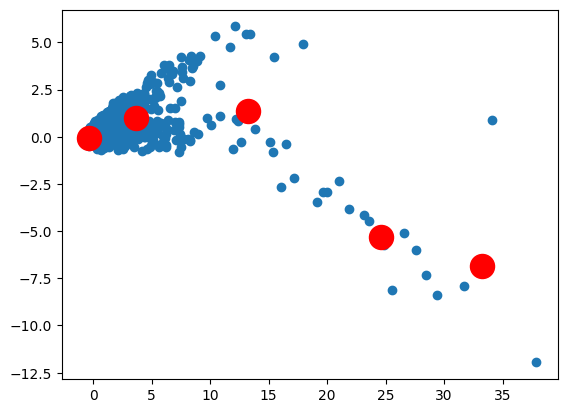

In [19]:
from matplotlib import pyplot as plt
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_pca_with_995)
plt.scatter(X_pca_with_995[:,0], X_pca_with_995[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [29]:
res_df_kmeans = kmeans.predict(X_pca_with_995_test)


In [30]:
res_df_kmeans

array([3, 2, 3, ..., 0, 3, 3], dtype=int32)

In [9]:
for d in data.SUBCLASS.unique():
    #print(d,len(total_gset[d]))
    inters = set(total_gset[d]).intersection( set(cgs['c.genes'].values))
    print(d, len(inters), len(total_gset[d]), len(inters)/len(total_gset[d]))

KIPAN 306 3007 0.101762554040572
SARC 170 1546 0.10996119016817593
SKCM 351 3933 0.08924485125858124
KIRC 246 2214 0.1111111111111111
GBMLGG 252 2300 0.10956521739130434
STES 353 4024 0.08772365805168986
BRCA 327 3486 0.09380378657487091
THCA 115 907 0.12679162072767364
LIHC 250 2393 0.10447137484329294
HNSC 297 3059 0.09709055246812684
PAAD 273 2740 0.09963503649635036
OV 222 1957 0.11343893714869699
PRAD 164 1393 0.11773151471643933
UCEC 351 4002 0.08770614692653673
LAML 60 316 0.189873417721519
COAD 335 3660 0.09153005464480875
ACC 179 1580 0.11329113924050632
LGG 148 1111 0.1332133213321332
LUSC 322 3329 0.09672574346650646
LUAD 322 3122 0.1031390134529148
CESC 341 2904 0.11742424242424243
PCPG 69 523 0.13193116634799235
THYM 66 388 0.17010309278350516
BLCA 300 2930 0.10238907849829351
TGCT 167 1365 0.12234432234432234
DLBC 202 1656 0.12198067632850242


###### PROCESS 

In [73]:
data =df.copy()
data

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,TRAIN_6195,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [74]:
data = data[data['SUBCLASS'] != 'COAD']

In [75]:
data

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,TRAIN_6195,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [76]:
interset = set(data.columns).intersection(cset)

In [77]:
len(interset)

368

In [78]:
data = data.loc[:, list(interset)]
data

,MUC1,IGF1R,IKZF2,CDH1,NIN,ERCC5,DCTN1,MERTK,SDHA,AKT3,...,PAK3,NUP98,CDKN2A,MLLT10,RUNX1,GNAS,SRSF3,EPHB4,XPO1,BCL3
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,R305S,WT,WT
1,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,G54E,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,WT,WT,WT,WT,WT,P441L,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6196,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,R174Q,WT,WT,WT,WT,WT
6197,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6199,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


### data , 5978,368

In [50]:
df_test = df_test.loc[:, list(interset)]
df_test

,MUC1,IGF1R,IKZF2,CDH1,NIN,ERCC5,DCTN1,MERTK,SDHA,AKT3,...,PAK3,NUP98,CDKN2A,MLLT10,RUNX1,GNAS,SRSF3,EPHB4,XPO1,BCL3
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,WT,WT,WT,WT,L1267L L1980L,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2542,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,D1749D,R80*,WT,WT,WT,WT,WT,WT,WT
2543,WT,N1127N N1126N,WT,W103G,P255Q,WT,C754Y C768Y C771Y C774Y C791Y C657Y C784Y,K746N,R507G R459G,WT,...,WT,P501H P492H P509H P526H P462H,WT,S460S S705S S721S,WT,D442A T380P,WT,WT,WT,R172W
2544,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [79]:
total = pd.concat([data, df_test])

In [80]:
def process_cell(value, col_name):
    if value == 'WT':  # 값이 'WT'이면 빈 문자열
        return ''
    elif value == '':
        return ''
    elif isinstance(value, str):  # 문자열일 때는 첫 글자 + 컬럼명
        return  str(value[0]+ col_name)
    elif isinstance(value, (int, float)):  # 숫자일 때는 첫 숫자(소수점 전) + 컬럼명
        return  str(str(value)[0] + col_name)
    return value  # 그 외에는 원래 값 반환

# 각 셀을 처리하는 함수 적용
for col in total.columns:
    total[col] = total[col].apply(lambda x: process_cell(x, col))


In [81]:
total

,MUC1,IGF1R,IKZF2,CDH1,NIN,ERCC5,DCTN1,MERTK,SDHA,AKT3,...,PAK3,NUP98,CDKN2A,MLLT10,RUNX1,GNAS,SRSF3,EPHB4,XPO1,BCL3
0,,,,,,,,,,,...,,,,,,,,REPHB4,,
1,,,,,,,,,,,...,,,,,,,,,,
2,,,,,,,,,,,...,GPAK3,,,,,,,,,
3,,,,,,,,,,,...,,,,,,,,,,
4,,,,,,PERCC5,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,0MUC1,0IGF1R,0IKZF2,0CDH1,0NIN,0ERCC5,0DCTN1,0MERTK,0SDHA,0AKT3,...,0PAK3,0NUP98,0CDKN2A,0MLLT10,0RUNX1,0GNAS,0SRSF3,0EPHB4,0XPO1,0BCL3
8743,0MUC1,0IGF1R,0IKZF2,0CDH1,0NIN,0ERCC5,0DCTN1,0MERTK,0SDHA,0AKT3,...,0PAK3,2NUP98,6CDKN2A,0MLLT10,0RUNX1,0GNAS,0SRSF3,0EPHB4,0XPO1,0BCL3
8744,0MUC1,6IGF1R,0IKZF2,1CDH1,5NIN,0ERCC5,2DCTN1,4MERTK,5SDHA,0AKT3,...,0PAK3,6NUP98,0CDKN2A,5MLLT10,0RUNX1,2GNAS,0SRSF3,0EPHB4,0XPO1,3BCL3
8745,0MUC1,0IGF1R,0IKZF2,0CDH1,0NIN,0ERCC5,0DCTN1,0MERTK,0SDHA,0AKT3,...,0PAK3,0NUP98,0CDKN2A,0MLLT10,0RUNX1,0GNAS,0SRSF3,0EPHB4,0XPO1,0BCL3


In [84]:
total

,MUC1,IGF1R,IKZF2,CDH1,NIN,ERCC5,DCTN1,MERTK,SDHA,AKT3,...,PAK3,NUP98,CDKN2A,MLLT10,RUNX1,GNAS,SRSF3,EPHB4,XPO1,BCL3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,1,1,1,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8743,1,1,1,2,2,1,1,1,1,1,...,1,3,5,1,1,1,1,1,1,1
8744,1,7,1,3,7,1,3,5,4,1,...,1,7,1,6,1,3,1,1,1,4
8745,1,1,1,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [85]:
total

,MUC1,IGF1R,IKZF2,CDH1,NIN,ERCC5,DCTN1,MERTK,SDHA,AKT3,...,PAK3,NUP98,CDKN2A,MLLT10,RUNX1,GNAS,SRSF3,EPHB4,XPO1,BCL3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,1,1,1,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8743,1,1,1,2,2,1,1,1,1,1,...,1,3,5,1,1,1,1,1,1,1
8744,1,7,1,3,7,1,3,5,4,1,...,1,7,1,6,1,3,1,1,1,4
8745,1,1,1,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [86]:
nRows = data.shape[0]
data = total[:nRows]
df_test = total[nRows:]

In [87]:
data

,MUC1,IGF1R,IKZF2,CDH1,NIN,ERCC5,DCTN1,MERTK,SDHA,AKT3,...,PAK3,NUP98,CDKN2A,MLLT10,RUNX1,GNAS,SRSF3,EPHB4,XPO1,BCL3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,20,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df = df[df['SUBCLASS']!='COAD']

In [89]:
from sklearn.preprocessing import LabelEncoder
y = df['SUBCLASS']
encoder2 = LabelEncoder()
y = encoder2.fit_transform(y)

In [90]:
y.shape

(5978,)

In [91]:
# 데이터프레임을 셀 단위로 고유값으로 변환
unique_values, unique_indices = pd.factorize(total.values.ravel())

# 고유값을 다시 데이터프레임 모양으로 변환
total_transformed = pd.DataFrame(unique_values.reshape(total.shape), columns=total.columns)

print(total_transformed)

      MUC1  IGF1R  IKZF2  CDH1  NIN  ERCC5  DCTN1  MERTK  SDHA  AKT3  ...  \
0        0      0      0     0    0      0      0      0     0     0  ...   
1        0      0      0     0    0      0      0      0     0     0  ...   
2        0      0      0     0    0      0      0      0     0     0  ...   
3        0      0      0     0    0      0      0      0     0     0  ...   
4        0      0      0     0    0      8      0      0     0     0  ...   
...    ...    ...    ...   ...  ...    ...    ...    ...   ...   ...  ...   
8519    29     29     29    28   28     29     29     29    29    29  ...   
8520    29     29     29    28   28     29     29     29    29    29  ...   
8521    29     24     29    31   24     29     31     26    30    29  ...   
8522    29     29     29    28   28     29     29     29    29    29  ...   
8523    29     29     29    28   28     29     29     29    29    29  ...   

      PAK3  NUP98  CDKN2A  MLLT10  RUNX1  GNAS  SRSF3  EPHB4  XPO1  BCL3  


In [92]:
data

,MUC1,IGF1R,IKZF2,CDH1,NIN,ERCC5,DCTN1,MERTK,SDHA,AKT3,...,PAK3,NUP98,CDKN2A,MLLT10,RUNX1,GNAS,SRSF3,EPHB4,XPO1,BCL3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,20,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
nRows = data.shape[0]
X = total_transformed[:nRows]
df_test = total_transformed[nRows:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=156)  

In [94]:
import xgboost as xgb 
dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [95]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    'num_class': df['SUBCLASS'].nunique()
}
num_boost_round = 50

dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round , early_stopping_rounds=5, 
                evals=[(dtrain, 'train'), (dtest, 'valid')],
                verbose_eval=2)

[0]	train-mlogloss:2.77255	valid-mlogloss:2.82015
[2]	train-mlogloss:2.45072	valid-mlogloss:2.59663
[4]	train-mlogloss:2.27051	valid-mlogloss:2.48936
[6]	train-mlogloss:2.14681	valid-mlogloss:2.43098
[8]	train-mlogloss:2.05625	valid-mlogloss:2.39451
[10]	train-mlogloss:1.98487	valid-mlogloss:2.37135
[12]	train-mlogloss:1.92866	valid-mlogloss:2.35218
[14]	train-mlogloss:1.88019	valid-mlogloss:2.33912
[16]	train-mlogloss:1.84078	valid-mlogloss:2.32983
[18]	train-mlogloss:1.80580	valid-mlogloss:2.32324
[20]	train-mlogloss:1.77421	valid-mlogloss:2.31901
[22]	train-mlogloss:1.74622	valid-mlogloss:2.31372
[24]	train-mlogloss:1.72141	valid-mlogloss:2.31287
[26]	train-mlogloss:1.69908	valid-mlogloss:2.31099
[28]	train-mlogloss:1.67524	valid-mlogloss:2.31122
[30]	train-mlogloss:1.65610	valid-mlogloss:2.31227
[31]	train-mlogloss:1.64637	valid-mlogloss:2.31356


In [96]:
df['SUBCLASS'].nunique()

25

In [97]:
total

,MUC1,IGF1R,IKZF2,CDH1,NIN,ERCC5,DCTN1,MERTK,SDHA,AKT3,...,PAK3,NUP98,CDKN2A,MLLT10,RUNX1,GNAS,SRSF3,EPHB4,XPO1,BCL3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,1,1,1,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8743,1,1,1,2,2,1,1,1,1,1,...,1,3,5,1,1,1,1,1,1,1
8744,1,7,1,3,7,1,3,5,4,1,...,1,7,1,6,1,3,1,1,1,4
8745,1,1,1,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [98]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    #'learning_rate': 0.05
}
num_boost_round = 1000

clf = xgb.XGBClassifier( n_estimators = 200,        # 부스팅 단계 수
                        max_depth = 6,             # 개별 트리의 최대 깊이
                        learning_rate = 0.01,       # 학습률, 낮출수록 느리게 학습하지만 성능 개선 가능
                        subsample=0.7,           # 각 부스팅 단계에서 사용할 샘플의 비율
                        #scale_pos_weight = class_weight_dict,  # 클래스별 가중치
                        colsample_bytree=0.3,    # 각 트리에서 사용할 특성의 비율
                        random_state = 42,         # 랜덤 시드
                        n_jobs = -1,             # 모든 CPU 코어 사용,
                        reg_alpha=0.03,
                        early_stopping_rounds = 50,                        
                        **params)
clf.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test,y_test)],
        verbose=2);

[0]	validation_0-mlogloss:3.21241	validation_1-mlogloss:3.21297
[2]	validation_0-mlogloss:3.19986	validation_1-mlogloss:3.20209
[4]	validation_0-mlogloss:3.18494	validation_1-mlogloss:3.18891
[6]	validation_0-mlogloss:3.17246	validation_1-mlogloss:3.17785
[8]	validation_0-mlogloss:3.15698	validation_1-mlogloss:3.16420
[10]	validation_0-mlogloss:3.14036	validation_1-mlogloss:3.14941
[12]	validation_0-mlogloss:3.12893	validation_1-mlogloss:3.13962
[14]	validation_0-mlogloss:3.11783	validation_1-mlogloss:3.13051
[16]	validation_0-mlogloss:3.10356	validation_1-mlogloss:3.11833
[18]	validation_0-mlogloss:3.09233	validation_1-mlogloss:3.10877
[20]	validation_0-mlogloss:3.08033	validation_1-mlogloss:3.09814
[22]	validation_0-mlogloss:3.06728	validation_1-mlogloss:3.08672
[24]	validation_0-mlogloss:3.05479	validation_1-mlogloss:3.07615
[26]	validation_0-mlogloss:3.04306	validation_1-mlogloss:3.06624
[28]	validation_0-mlogloss:3.03145	validation_1-mlogloss:3.05590
[30]	validation_0-mlogloss:3.0

In [99]:
y_true = y_test
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
y_true.shape, y_pred.shape, y_score.shape

((1794,), (1794,), (1794, 25))

In [100]:
from sklearn import metrics 
metrics.accuracy_score(y_true, y_pred)

0.3004459308807135

In [101]:
metrics.roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')

0.8043619725445955

In [102]:
clf.predict(df_test)

array([9, 9, 9, ..., 9, 9, 9])

In [103]:
res = clf.predict(df_test)
res = encoder2.inverse_transform(res)

df_test1 = pd.read_csv('../input/test.csv')
res_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res})
res_df


,ID,SUBCLASS
0,TEST_0000,LAML
1,TEST_0001,LAML
2,TEST_0002,LAML
3,TEST_0003,LAML
4,TEST_0004,ACC
...,...,...
2541,TEST_2541,LAML
2542,TEST_2542,LAML
2543,TEST_2543,LAML
2544,TEST_2544,LAML


In [108]:
for t in empty_lines : 
    #print(t, df_test.iloc[t].apply(lambda x : 1 if x!='WT' else 0).agg(sum))
    res_df['SUBCLASS'][t]='COAD'

/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_90634/2959049448.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  res_df['SUBCLASS'][t]='COAD'


In [109]:
res_df['SUBCLASS'].value_counts()

SUBCLASS
LAML    2046
COAD     450
ACC       50
Name: count, dtype: int64

In [110]:
#zerosl = list(df_test[(df_test_2 == 0).all(axis=1)].index)
zerosl = [17, 180, 187, 214, 219, 294, 374, 446, 450, 545, 676, 696, 787, 855, 979, 1055, 1249, 1542, 1770, 1785, 1832, 1866, 1965, 2046, 2059, 2118, 2132, 2153, 2340, 2412, 2481]
res_df.loc[zerosl, 'SUBCLASS'] = 'THYM'
res_df.SUBCLASS.value_counts()

SUBCLASS
LAML    2015
COAD     450
ACC       50
THYM      31
Name: count, dtype: int64

In [111]:
res_df_kmeans

array([3, 2, 3, ..., 0, 3, 3], dtype=int32)

In [114]:
for i in range(0, len(res_df_kmeans)):
    if res_df_kmeans[i] == 3:
        res_df['SUBCLASS'][i] = 'BRCA'
    elif res_df_kmeans[i] == 4:
        res_df['SUBCLASS'][i] = 'KIRC'
    elif res_df_kmeans[i] == 5:
        res_df['SUBCLASS'][i] = 'SKCM'
    elif res_df_kmeans[i] == 1:
        res_df['SUBCLASS'][i] = 'PRAD'
    
        

/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_90634/3891963382.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  res_df['SUBCLASS'][i] = 'BRCA'
/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_90634/3891963382.py:9: 

In [115]:
res_df['SUBCLASS'].value_counts()

SUBCLASS
BRCA    2333
LAML     113
PRAD      61
COAD      26
ACC       11
KIRC       2
Name: count, dtype: int64

In [ ]:
df_cat_data = data.copy()
df_cat_data['SUBCLASS'].map({'PRAD': 1, 'LUAD': 2, 'BRCA': 3, 'KIRC': 4, 'SKCM': 5}).dropna()

In [ ]:
d = 'COAD'
set(total_gset[d]).intersection( set(cgs['c.genes'].values))

In [ ]:
for d in data.SUBCLASS.unique():
    #print(d,len(total_gset[d]))
    inters = set(total_gset[d]).intersection( set(cgs['c.genes'].values))
    print(d, len(inters), len(total_gset[d]), len(inters)/len(total_gset[d]))

In [ ]:
for d in df.SUBCLASS.unique():
    #print(d,len(total_gset[d]))
    tdf = df[df.SUBCLASS==d]
    print(tdf.iloc[:,2:].apply(get_non_wt_columns, axis=1).reset_index(name='gset').drop('index',axis=1))
    #print(tdf['gset'])
    #inters = set().intersection( set(cgs['c.genes'].values))

In [26]:
nott[nott.inters==0]


,gset,inters
19,"[AHNAK, CD209, DTX2, ISL1, ITGAV, KLF2, MMP9, ...",0
80,"[AHNAK, CACNA1A, CPEB2, FGFR3, H2AX, HIPK2, MA...",0


In [ ]:
#Standard scaler를 test data로 같이함